In [1]:
import pandas as pd
pd.set_option("display.max_columns",100)
import numpy as np

from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("advertising.csv")

In [3]:
df.sample(5)

,TV,Radio,Newspaper,Sales
6,57.5,32.8,23.5,11.8
45,175.1,22.5,31.5,14.9
76,27.5,1.6,20.7,6.9
59,210.7,29.5,9.3,18.4
111,241.7,38.0,23.2,21.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.shape

(200, 4)

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [8]:
abs(df.corr()['Sales']).sort_values(ascending=False)

Sales        1.000000
TV           0.782224
Radio        0.576223
Newspaper    0.228299
Name: Sales, dtype: float64

<AxesSubplot: >

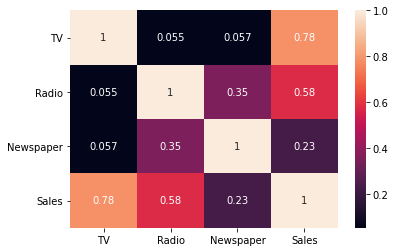

In [9]:
sns.heatmap(df.corr(),annot=True)

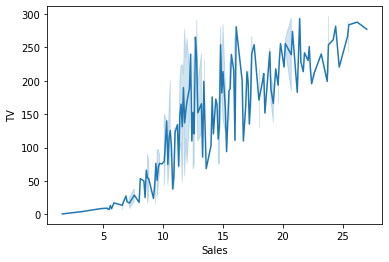

In [10]:
sns.lineplot(x="Sales",y="TV",data=df);

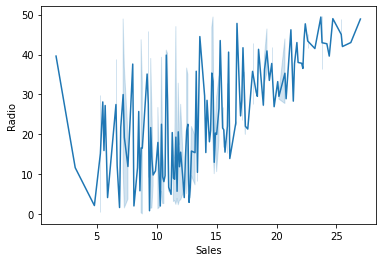

In [11]:
sns.lineplot(x="Sales",y="Radio",data=df);

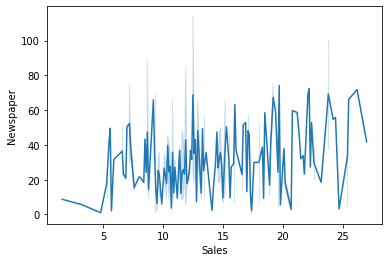

In [12]:
sns.lineplot(x="Sales",y="Newspaper",data=df);

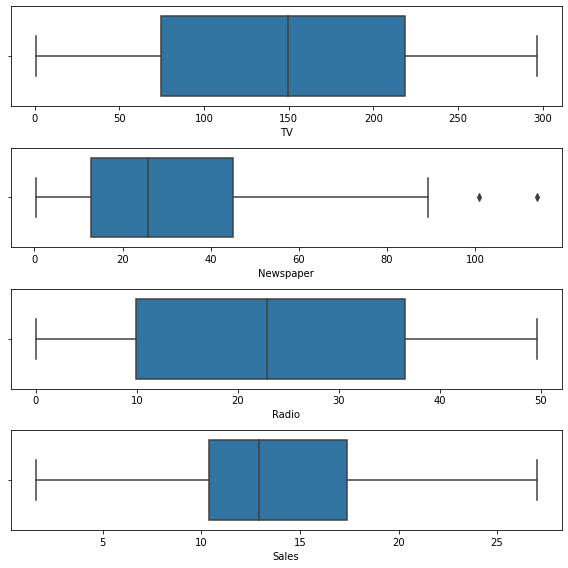

In [13]:
fig, axs = plt.subplots(4, figsize = (8,8))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt4 = sns.boxplot(df['Sales'], ax = axs[3])
plt.tight_layout()

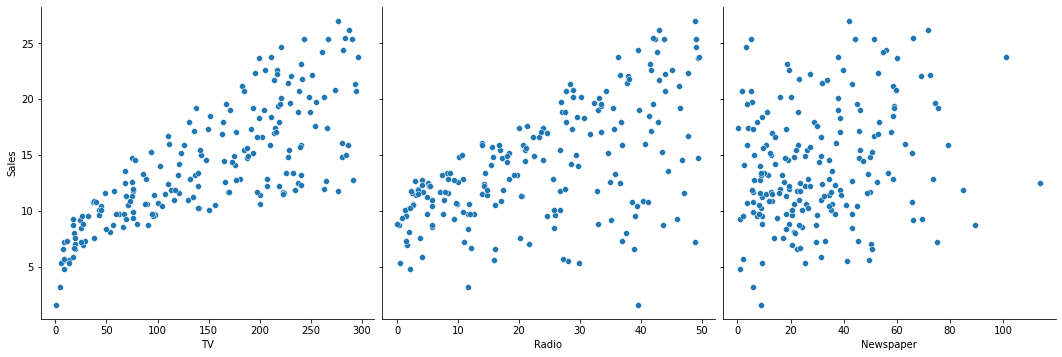

In [14]:
sns.pairplot(data = df, x_vars = ['TV','Radio','Newspaper'], y_vars='Sales', height=5, aspect=1);

With newspaper having such a low correlation to sales we create two linear regression models, one excluding newspaper and the other excluding!!

In [15]:
lr = LinearRegression()

In [16]:
x,y=df.drop('Sales',axis=1),df[['Sales']]

In [17]:
model = lr.fit(x[['TV', 'Radio']], y)
prediction = model.predict(x[['TV', 'Radio']])
print("R^2: ", r2_score(y, prediction))

R^2:  0.8971942610828956


In [18]:
model = lr.fit(x, y)
prediction = model.predict(x)
print("R^2: ", r2_score(y, prediction))

R^2:  0.8972106381789522


We then further evluate the model with test and training data and use the root mean squared error to calculate which if newspaper is a good variable to use for the model. We therefore split the test and training data and make two seperate linear regression models and use testing data to calculate accuracy.

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [20]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [21]:
model = lr.fit(x_train, y_train)
prediction = model.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, prediction)))
print("R^2: ", r2_score(y_test, prediction))

RMSE:  1.7815996615334504
R^2:  0.899438024100912


In [22]:
x= df[['TV']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

model = lr.fit(x_train, y_train)
prediction = model.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, prediction)))
print("R^2: ", r2_score(y_test, prediction))

RMSE:  3.194472431998898
R^2:  0.6766954295627077


In [23]:
x=df[['TV', 'Radio']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

model = lr.fit(x_train, y_train)
prediction = model.predict(x_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, prediction)))
print("R^2: ", r2_score(y_test, prediction))

RMSE:  1.771425417303351
R^2:  0.9005833101920356


From the results, it has shown the excluding newspaper makes the better model.

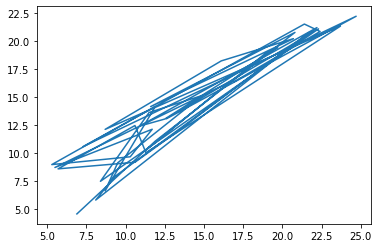

In [26]:
plt.plot(y_test,prediction)  
plt.show()